In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       109                0            2.4            2   
1       160                0            1.6            2   
2       141                0            0.3            1   
3       105                1            0.2            2   
4       121                1            0.2            1   
..      ...              ...            ...          ...   
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium Heart Disease  
0                          3         3      Presence  
1                          0         7       Absence  
2                          0         7      Presence  
3                          1         7       Absence  
4                          1         3       Absence  
..                       ...       ...           ...  
265                        0         7       Absence  
266                        0         7       Absence  
267                        0         3       Absence  
268                        0         6       Absence  
269                        3         3      Presence  

[270 rows x 14 columns]

In [3]:
df['Heart Disease'] = df['Heart Disease'].astype('category')
df['Heart Disease Codes'] = df['Heart Disease'].cat.codes

In [4]:
df_new = df.drop('Heart Disease', axis=1)
df_new.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease Codes  
0                        3         3                    1  
1                        0         7                    0  
2                        0         7                    1  
3                        1         7                    0  
4                        1         3                    0

In [5]:
df_new.describe()

Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  Heart Disease Codes  
count   270.000000               270.000000  270.000000           270.000000  
mean      1.585185                 0.670370    4.696296             0.444444  
std       0.614390                 0.943896    1.940659             0.497827  
min       1.000000                 0.000000    3.000000             0.000000  
25%       1.000000                 0.000000    3.000000             0.000000  
50%       2.000000                 0.000000    3.000000             0.000000  
75%       2.000000                 1.000000    7.000000             1.000000  
max       3.000000                 3.000000    7.000000             1.000000

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease Codes      270 non-null    int8   
dtypes: float64(1), int64(12), 

In [7]:
df_new.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease Codes'],
      dtype='object')

In [8]:
df_new.shape

(270, 14)

In [9]:
df_new.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease Codes        0
dtype: int64

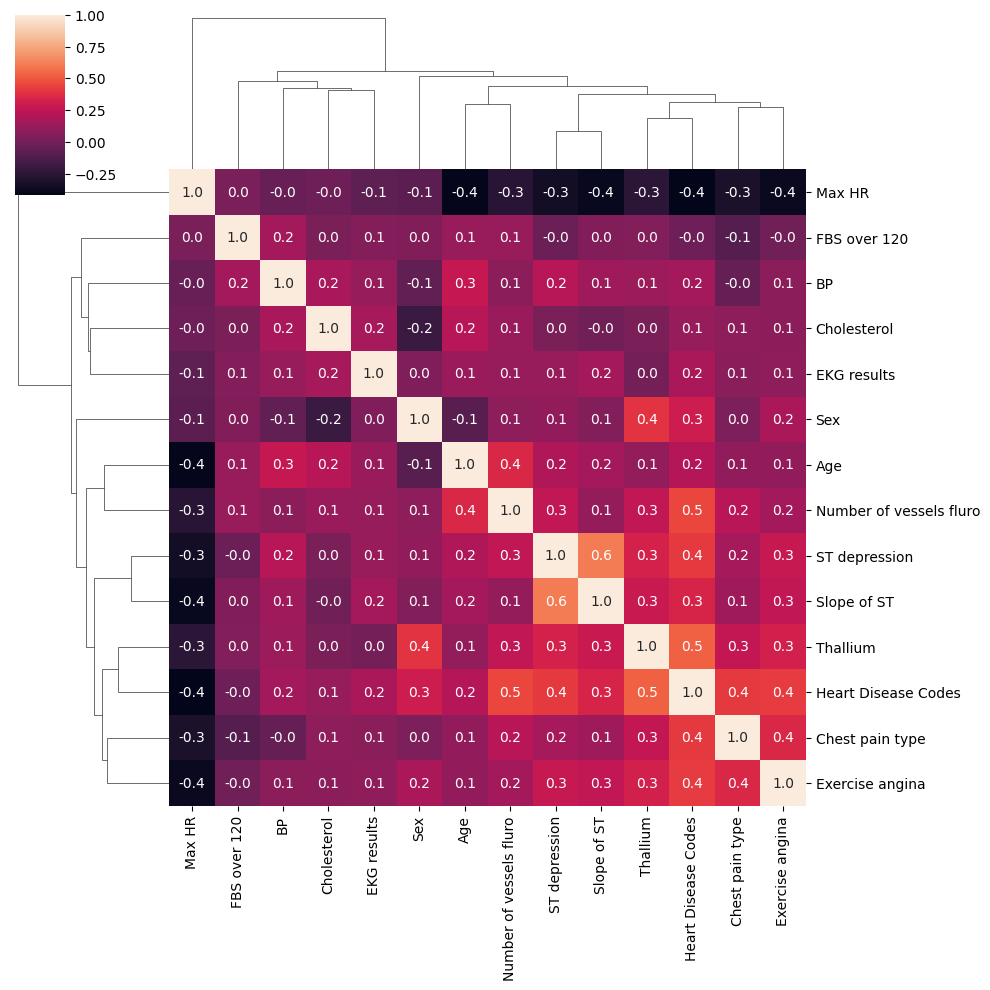

In [10]:
sns.clustermap(df_new.corr(), annot=True, fmt='.1f')

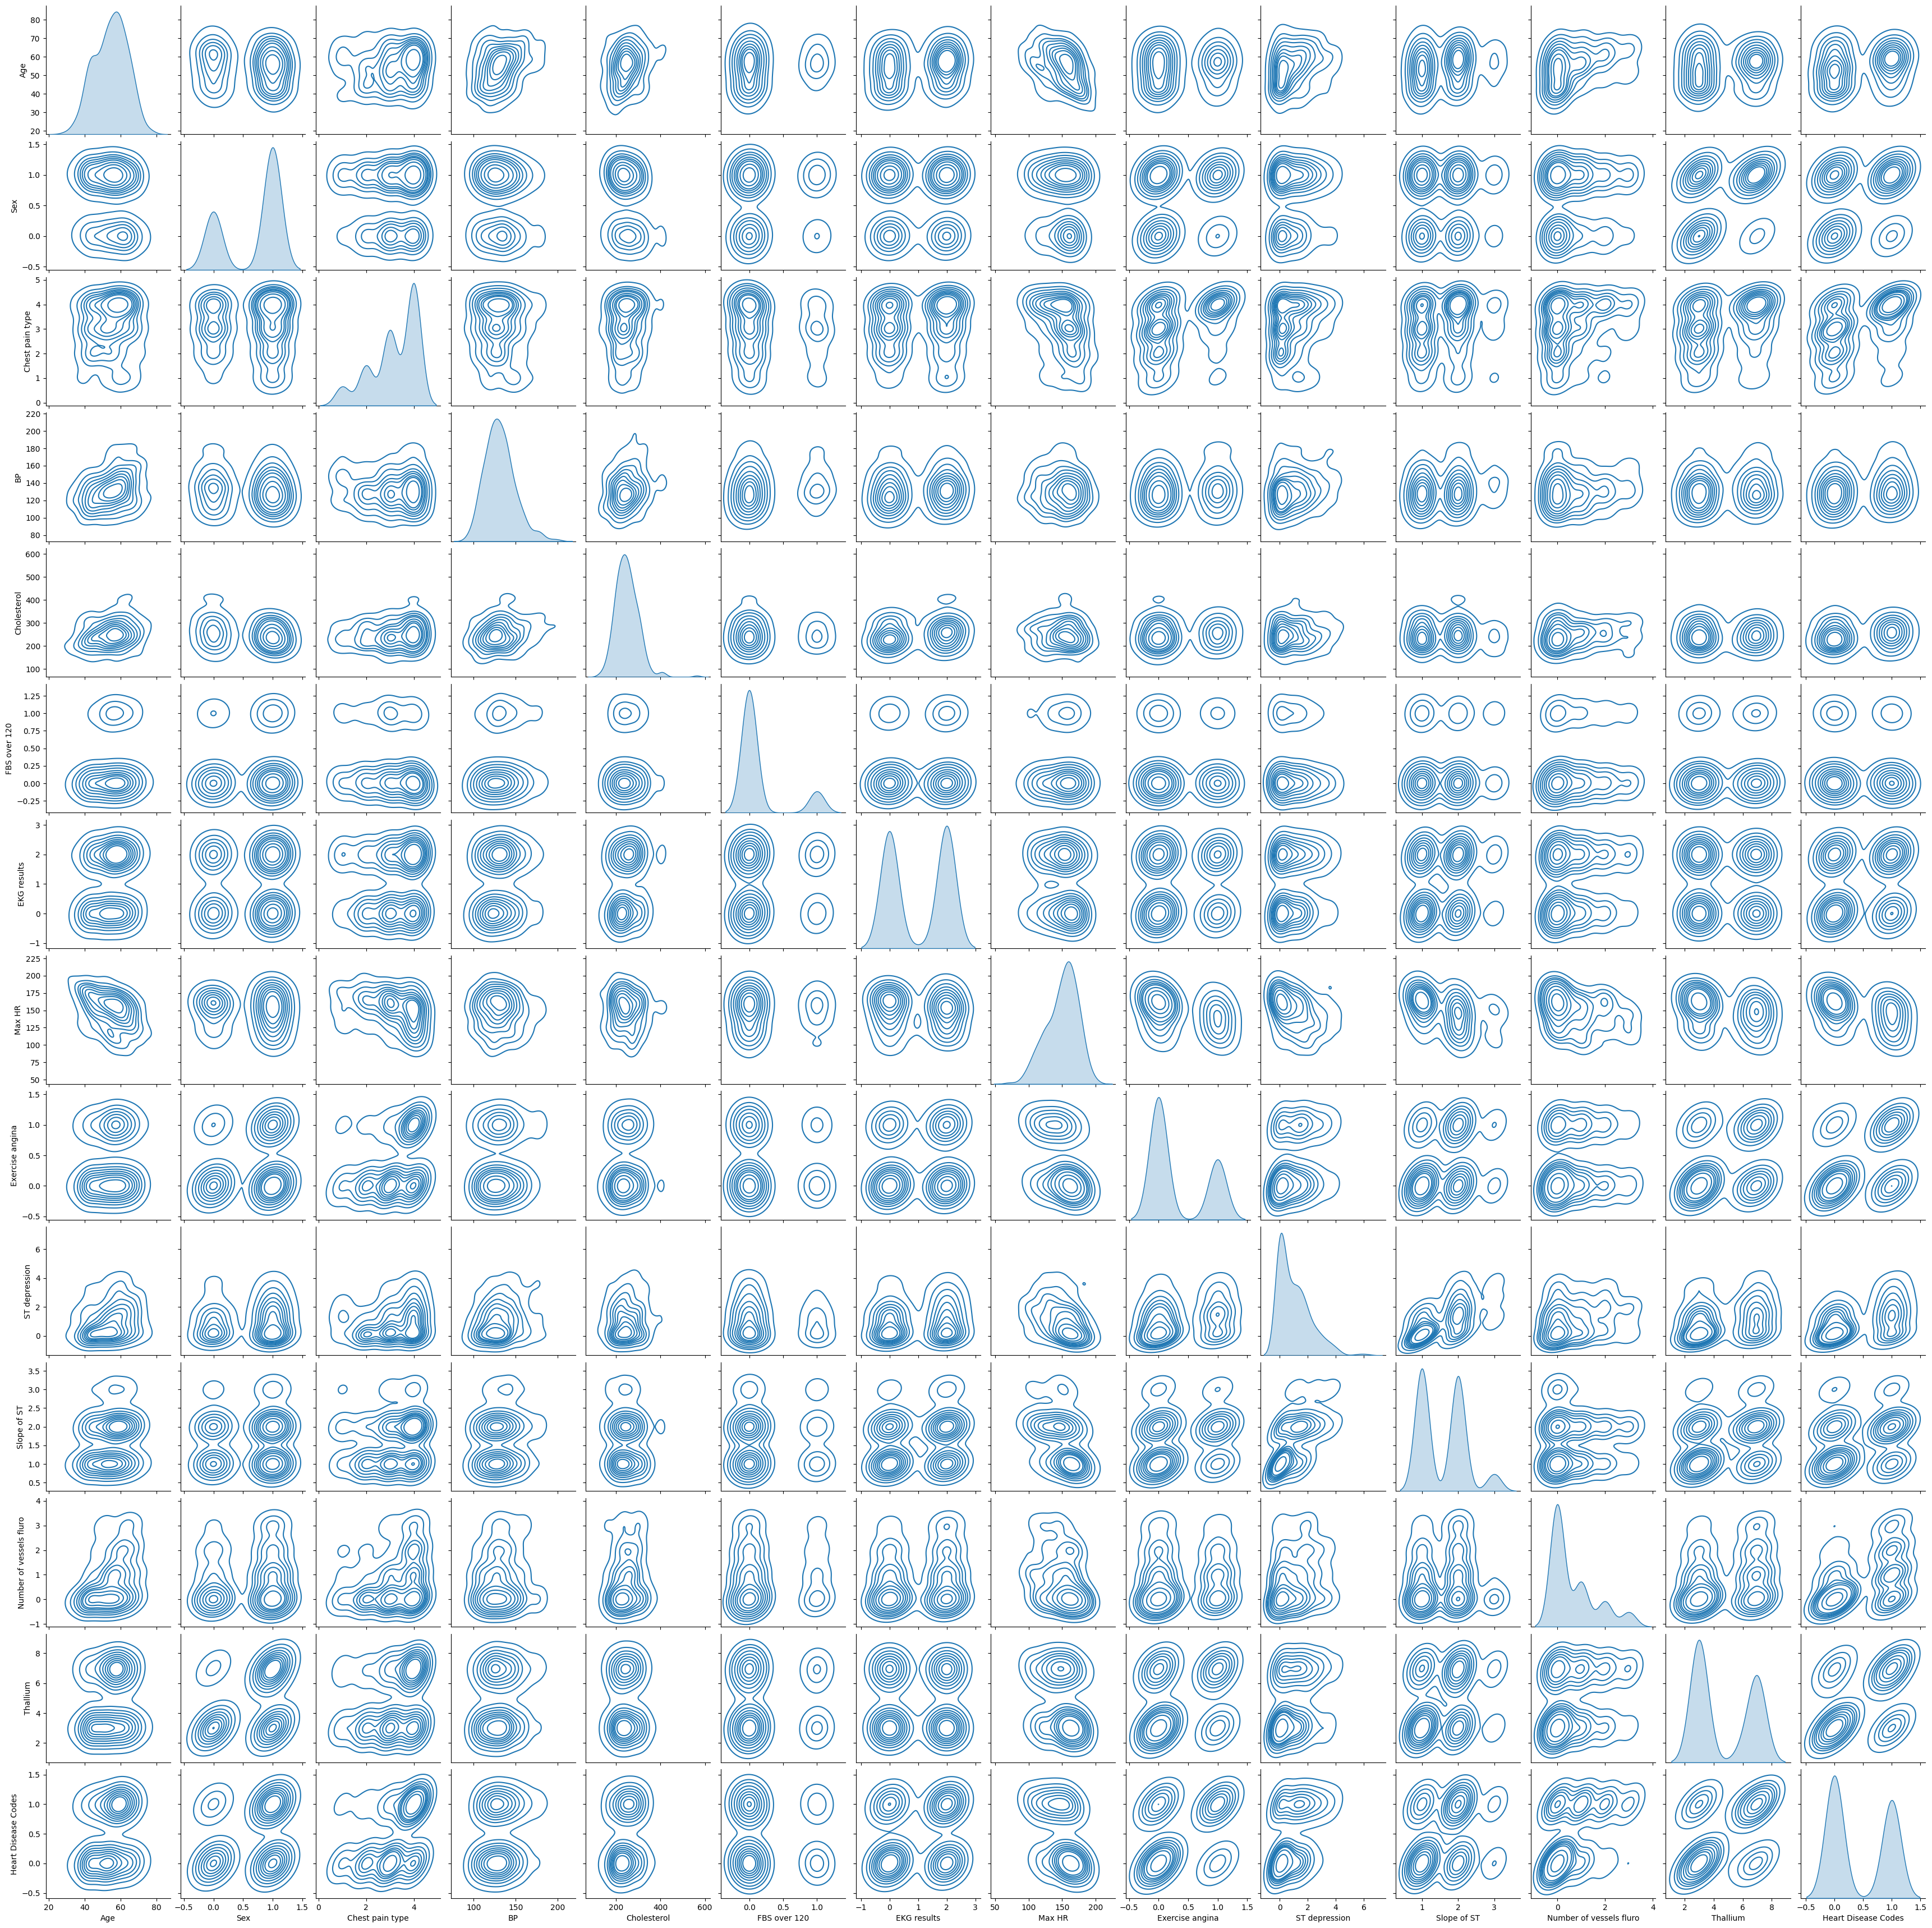

In [11]:
sns.pairplot(df_new, kind="kde")

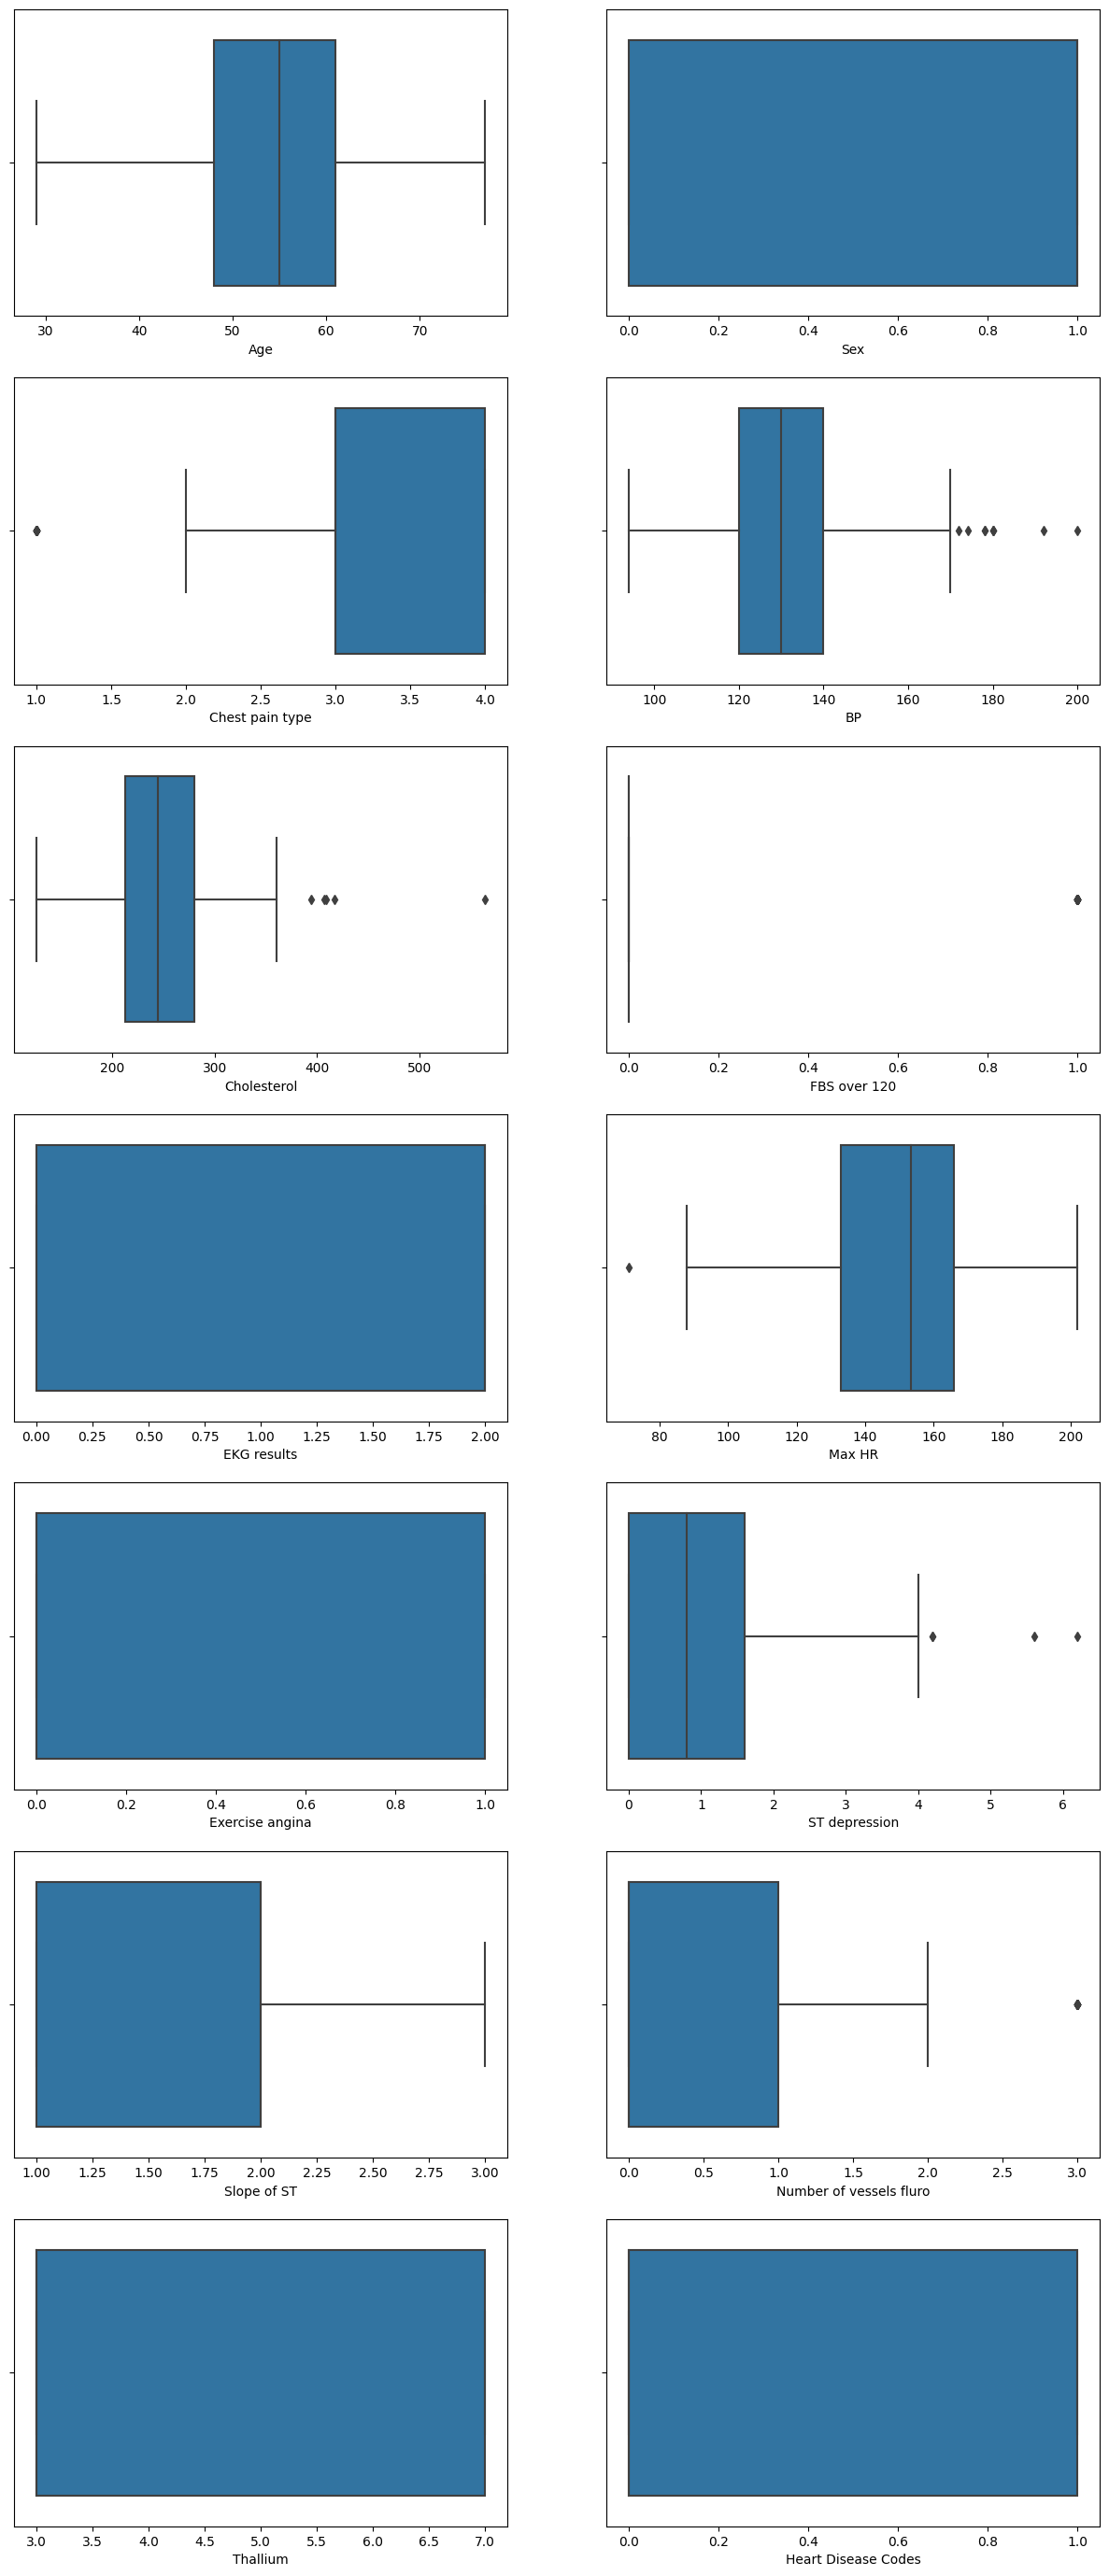

In [12]:
features = df_new.drop('Heart Disease Codes',axis=1)
features = df_new.columns.tolist()

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15,35))

for i, var in enumerate(features):
    x=i//2
    y=i%2
    sns.boxplot(data=df_new, x=var, ax=ax[x,y])


In [13]:
lof = LocalOutlierFactor(n_neighbors=20)
df['lof_score'] = lof.fit_predict(df[features])
outliers = df[df['lof_score'] == -1]

print(f"Found {len(outliers)} outliers at indices {outliers.index.tolist()}")

df.drop('lof_score', axis=1, inplace=True) #Returning the data frame to the previous state

Found 8 outliers at indices [1, 9, 52, 60, 100, 144, 181, 188]


In [14]:
df = df.drop([1, 9, 52, 60, 100, 144, 181, 188]) 

In [15]:
x = df_new.drop('Heart Disease Codes',axis=1)

In [16]:
y = df_new['Heart Disease Codes']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [18]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape, '\n')
print('X_train info', X_train.info(), '\n')
print('X_train info', X_test.info())

X_train shape: (216, 13)
X_test shape: (54, 13)
y_train shape: (216,)
y_test shape: (54,) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 49 to 132
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      216 non-null    int64  
 1   Sex                      216 non-null    int64  
 2   Chest pain type          216 non-null    int64  
 3   BP                       216 non-null    int64  
 4   Cholesterol              216 non-null    int64  
 5   FBS over 120             216 non-null    int64  
 6   EKG results              216 non-null    int64  
 7   Max HR                   216 non-null    int64  
 8   Exercise angina          216 non-null    int64  
 9   ST depression            216 non-null    float64
 10  Slope of ST              216 non-null    int64  
 11  Number of vessels fluro  216 non-null    int64  
 12  Thallium                 216 non-null    

In [19]:
lasso_cv = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

In [20]:
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', accuracy_score)

accuracy score: 0.8888888888888888


In [21]:
KF = KFold(n_splits=5, shuffle=True, random_state=0)
CVS = cross_val_score(lasso_cv, X_test, y_pred, cv=KF)
print('Cross val score:', CVS)

Cross val score: [0.6733004  0.61046489 0.41783795 0.76106644 0.84943175]


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.90      0.83      0.86        23

    accuracy                           0.89        54
   macro avg       0.89      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54



In [23]:
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[29  2]
 [ 4 19]]
